<a href="https://colab.research.google.com/github/Philocreation/Practice_Data_Cleaning/blob/main/red_white_wine_cleaning(%2B_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# csv 파일 불러오기 

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_red = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=';')
#df_red.head(10)
df_white = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep=';')
#df_white.head(10)

# 이상치, 결측치 생략(이미 정제된 실습데이터 받음)

# t - 검정 

In [ ]:
red_quality = df_red.iloc[:,-1:]
white_quality = df_white.iloc[:,-1:]

In [ ]:
red_quality_mean = df_red.iloc[:,-1:].mean()
red_quality_mean

quality    5.636023
dtype: float64

In [ ]:
from scipy import stats

qua = df_red.quality
result = stats.ttest_1samp(qua, 5.6)
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 1.784 
p-value : 0.075


In [ ]:
#df_mix.quality.mean()

NameError: ignored

In [ ]:
df_mix = pd.concat([df_red,df_white])

qua = df_mix.quality
result = stats.ttest_1samp(qua, 5.818)
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 0.035 
p-value : 0.972


# 상관관계 분석

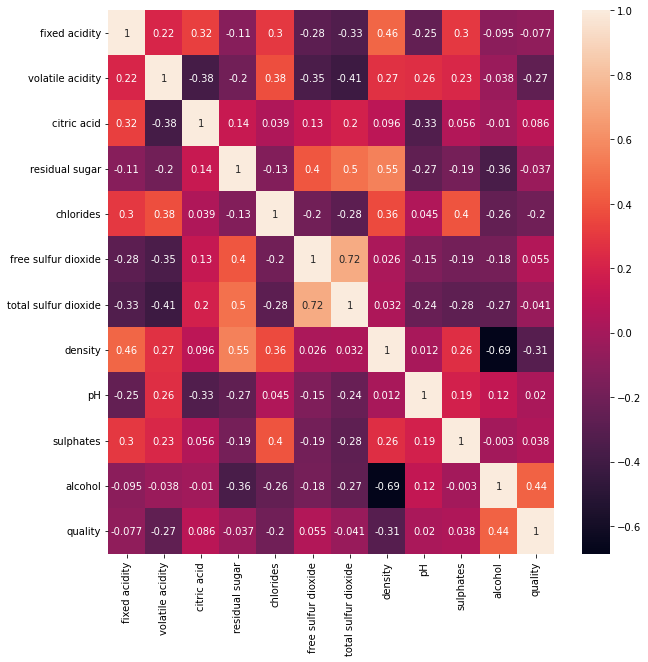

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(df_mix.corr(), annot=True)

# nomalization

In [ ]:
df_nomal = (df_mix - df_mix.min()) / (df_mix.max() - df_mix.min())
df_nomal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667


#다중 공선성 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_mix.values, i)
                     for i in range(df_mix.shape[1])]
vif["features"] = df_mix.columns
print(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    VIF Factor              features
0    58.907356         fixed acidity
1     9.502423      volatile acidity
2     9.343181           citric acid
3     3.623418        residual sugar
4     5.580536             chlorides
5     8.534873   free sulfur dioxide
6    14.886028  total sulfur dioxide
7   943.737171               density
8   589.521304                    pH
9    18.722063             sulphates
10  130.008984               alcohol
11   63.920799               quality


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_nomal.values, i)
                     for i in range(df_nomal.shape[1])]
vif["features"] = df_nomal.columns
print(vif)

    VIF Factor              features
0    38.815648         fixed acidity
1     6.965016      volatile acidity
2     9.178386           citric acid
3    14.553379        residual sugar
4     4.502076             chlorides
5     8.121453   free sulfur dioxide
6    11.111983  total sulfur dioxide
7   110.785172               density
8    25.583094                    pH
9     8.334871             sulphates
10   22.894101               alcohol
11   14.405229               quality


In [ ]:
df_nomal_drop = df_nomal.drop(['density'], axis=1)
df_nomal_drop

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.612403,0.191011,0.202899,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.426357,0.157303,0.463768,0.500000
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.333333,0.134831,0.231884,0.333333
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.209302,0.134831,0.202899,0.500000
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.480620,0.089888,0.695652,0.666667


In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_nomal_drop.values, i)
                     for i in range(df_nomal_drop.shape[1])]
vif["features"] = df_nomal_drop.columns
print(vif)

    VIF Factor              features
0    11.173054         fixed acidity
1     5.924229      volatile acidity
2     9.159616           citric acid
3     3.036144        residual sugar
4     4.234540             chlorides
5     8.121387   free sulfur dioxide
6    11.043806  total sulfur dioxide
7    10.495199                    pH
8     7.337868             sulphates
9     8.252486               alcohol
10   14.393953               quality


In [ ]:
df_nomal_drop1 = df_nomal_drop.drop(['pH'], axis=1)

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_nomal_drop1.values, i)
                     for i in range(df_nomal_drop1.shape[1])]
vif["features"] = df_nomal_drop1.columns
print(vif)

   VIF Factor              features
0   11.025950         fixed acidity
1    5.026236      volatile acidity
2    9.158841           citric acid
3    3.014030        residual sugar
4    4.225511             chlorides
5    8.094917   free sulfur dioxide
6   10.780120  total sulfur dioxide
7    6.843180             sulphates
8    8.020865               alcohol
9   13.390715               quality


In [ ]:
df_nomal_drop2 = df_nomal_drop1.drop(['quality'], axis=1)

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_nomal_drop2.values, i)
                     for i in range(df_nomal_drop2.shape[1])]
vif["features"] = df_nomal_drop2.columns
print(vif)

   VIF Factor              features
0   10.699809         fixed acidity
1    4.991984      volatile acidity
2    9.151600           citric acid
3    2.927900        residual sugar
4    4.216336             chlorides
5    7.958456   free sulfur dioxide
6   10.687198  total sulfur dioxide
7    6.578816             sulphates
8    4.709154               alcohol


In [ ]:
df_nomal_drop3 = df_nomal_drop2.drop(['fixed acidity','total sulfur dioxide'], axis=1)

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_nomal_drop3.values, i)
                     for i in range(df_nomal_drop3.shape[1])]
vif["features"] = df_nomal_drop3.columns
print(vif)

   VIF Factor             features
0    4.170899     volatile acidity
1    5.931332          citric acid
2    2.619190       residual sugar
3    4.149401            chlorides
4    4.030852  free sulfur dioxide
5    6.182672            sulphates
6    4.665457              alcohol


# 훈련, 테스트 만들기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [ ]:
inde_var = df_nomal_drop3.to_numpy()
print(inde_var.shape)
de_var = df_nomal.iloc[:,-1:].to_numpy()
print(de_var.shape)

(6497, 7)
(6497, 1)


In [ ]:

train_input, test_input, train_target, test_target = train_test_split(
    inde_var,de_var, random_state=42)

#train_input = train_input.reshape(-1,1)
#test_input = test_input.reshape(-1,1)

#print(train_input.shape)
print(type(train_input))
print(type(train_target))
#print(test_input.shape)
#print(train_target.shape)
#print(test_target.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [ ]:
print(train_poly.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(4872, 35)
(4872, 1)
(1625, 7)
(1625, 1)


# 다중 선형 회귀 

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

0.3209076896113958


# OLS

In [ ]:
model = sm.OLS(train_target, train_poly)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              2146.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        04:38:06   Log-Likelihood:                          3371.0
No. Observations:                4872   AIC:                                     -6672.
Df Residuals:                    4837   BIC:                                     -6445.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dt_clf = DecisionTreeClassifier()
y_target = df_mix['quality']
x_data = df_mix.drop('quality', axis=1, inplace=False)
train_input, test_input, train_target, test_target = train_test_split(
    x_data,y_target,test_size=0.2, random_state=42)


dt_clf.fit(train_input,train_target)

DecisionTreeClassifier()

In [ ]:
print(train_input.shape)
print(train_target.shape)

AttributeError: ignored

In [ ]:
df_mix.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
#target_names = df_mix.columns[11]
#feature_names = df_mix.columns[1:10]

export_graphviz(dt_clf, out_file="tree.dot", class_names=df_mix.columns[11], \
                feature_names = df_mix.columns[:11], impurity=True, filled=True)

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)